In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("./Dataset/CIC_IDS_2017_cleaned.csv")
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,binary_label
0,49188,4,2,0,12,0,6,6,6.000000,0.000000,0,0,0.0,0.000000,3.000000e+06,5.000000e+05,4.0,0.000000,4,4,4,4.0,0.000000,4,4,0,0.000000,0.000000,0,0,0,0,0,0,40,0,5.000000e+05,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0,0
1,49188,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.0,0.000000,1.200000e+07,2.000000e+06,1.0,0.000000,1,1,1,1.0,0.000000,1,1,0,0.000000,0.000000,0,0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0,0
2,49486,3,2,0,12,0,6,6,6.000000,0.000000,0,0,0.0,0.000000,4.000000e+06,6.666667e+05,3.0,0.000000,3,3,3,3.0,0.000000,3,3,0,0.000000,0.000000,0,0,0,0,0,0,40,0,6.666667e+05,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.0,40,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0,0
3,49486,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.0,0.000000,1.200000e+07,2.000000e+06,1.0,0.000000,1,1,1,1.0,0.000000,1,1,0,0.000000,0.000000,0,0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.0,40,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0,0
4,88,609,7,4,484,414,233,0,69.142857,111.967895,207,0,103.5,119.511506,1.474548e+06,1.806240e+04,60.9,115.194956,381,2,609,101.5,177.089525,460,2,467,155.666667,263.560872,460,3,0,0,0,0,164,104,1.149425e+04,6568.144499,0,233,74.833333,107.527445,11562.151515,0,0,0,1,0,0,0,0,0,81.636364,69.142857,103.5,164,0,0,0,0,0,0,7,484,4,414,8192,2053,5,20,0.0,0.0,0,0,0.0,0.0,0,0,0,0


In [4]:
# Shape of the data ---> 2.5+ million sampleswith 80 features
data.shape

(2520798, 80)

In [5]:
# Data types for each of the 80 features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520798 entries, 0 to 2520797
Data columns (total 80 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [6]:
# General statistics 
data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,binary_label
count,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2520798.0,2.520798e+06,2520798.0,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2520798.0,2520798.0,2520798.0,2520798.0,2520798.0,2520798.0,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06
mean,8.690590e+03,1.659161e+07,1.028174e+01,1.157280e+01,6.119477e+02,1.814440e+04,2.312292e+02,1.920349e+01,6.350497e+01,7.732347e+01,9.749726e+02,4.315945e+01,3.406225e+02,3.765453e+02,1.410707e+06,4.729188e+04,1.446142e+06,3.278153e+06,1.029948e+07,1.704214e+05,1.625184e+07,2.919257e+06,3.668641e+06,1.014294e+07,1.135671e+06,1.111025e+07,2.027734e+06,1.668681e+06,5.260619e+06,1.086111e+06,4.866832e-02,0.0,3.173598e-05,0.0,-2.920023e+04,-2.555236e+03,4.085969e+04,6.513513e+03,1.683200e+01,1.063750e+03,1.906548e+02,3.302006e+02,5.457761e+05,3.209539e-02,4.866832e-02,2.721360e-04,2.976085e-01,3.118723e-01,1.013929e-01,3.173598e-05,2.733261e-04,7.004476e-01,2.124358e+02,6.350497e+01,3.406225e+02,-2.920023e+04,0.0,0.0,0.0,0.0,0.0,0.0,1.028174e+01,6.119359e+02,1.157280e+01,1.814402e+04,7.265614e+03,2.228725e+03,6.009478e+00,-3.082233e+03,9.157847e+04,4.619177e+04,1.720171e+05,6.546359e+04,9.337367e+06,5.657941e+05,9.763770e+06,8.892671e+06,8.132294e-01,1.688914e-01
std,1.901280e+04,3.523276e+07,7.944201e+02,1.056922e+03,1.058827e+04,2.398177e+06,7.563755e+02,6.079834e+01,1.955526e+02,2.968814e+02,2.038347e+03,7.087972e+01,6.325636e+02,8.810547e+02,2.657084e+07,2.026366e+05,4.683197e+06,8.456754e+06,2.568537e+07,3.014304e+06,3.516638e+07,1.001639e+07,1.014208e+07,2.576650e+07,9.059498e+06,3.022924e+07,9.393386e+06,6.630315e+06,1.810168e+07,8.797215e+06,2.151737e-01,0.0,5.633382e-03,0.0,2.230962e+07,1.538899e+06,1.932655e+05,3.814460e+04,2.558415e+01,2.121693e+03,3.183562e+02,6.608889e+02,1.736478e+06,1.762535e-01,2.151737e-01,1.649430e-02,4.572065e-01,4.632581e-01,3.018483e-01,5.633382e-03,1.653032e-02,6.956600e-01,3.455032e+02,1.

In [7]:
# Checking for null instances
data.isnull().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                    0
Fwd IAT Min                    0
Bwd IAT Total                  0
Bwd IAT Mean                   0
Bwd IAT Std                    0
Bwd IAT Max                    0
Bwd IAT Min                    0
Fwd PSH Fl

In [8]:
# Checking for duplicate samples
data.duplicated().sum()

0

0     2095057
4      172846
2      128014
10      90694
3       10286
7        5931
6        5385
5        5228
11       3219
1        1948
12       1470
14        652
9          36
13         21
8          11
Name: Label, dtype: int64


Text(0, 0.5, 'Distribution (in millions)')

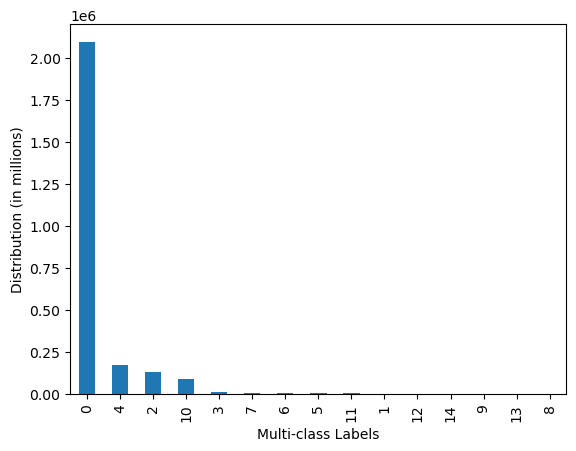

In [9]:
print(data['Label'].value_counts())
data['Label'].value_counts().plot(kind='bar')
plt.xlabel('Multi-class Labels')
plt.ylabel('Distribution (in millions)')

0    2095057
1     425741
Name: binary_label, dtype: int64


Text(0, 0.5, 'Distribution (in millions)')

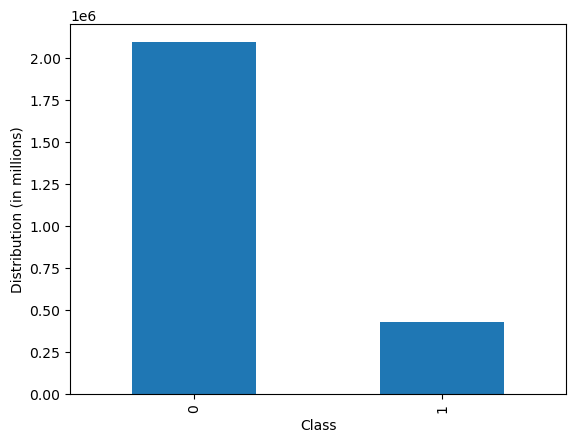

In [10]:
print(data['binary_label'].value_counts())
data['binary_label'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Distribution (in millions)')

<Figure size 1500x1500 with 0 Axes>

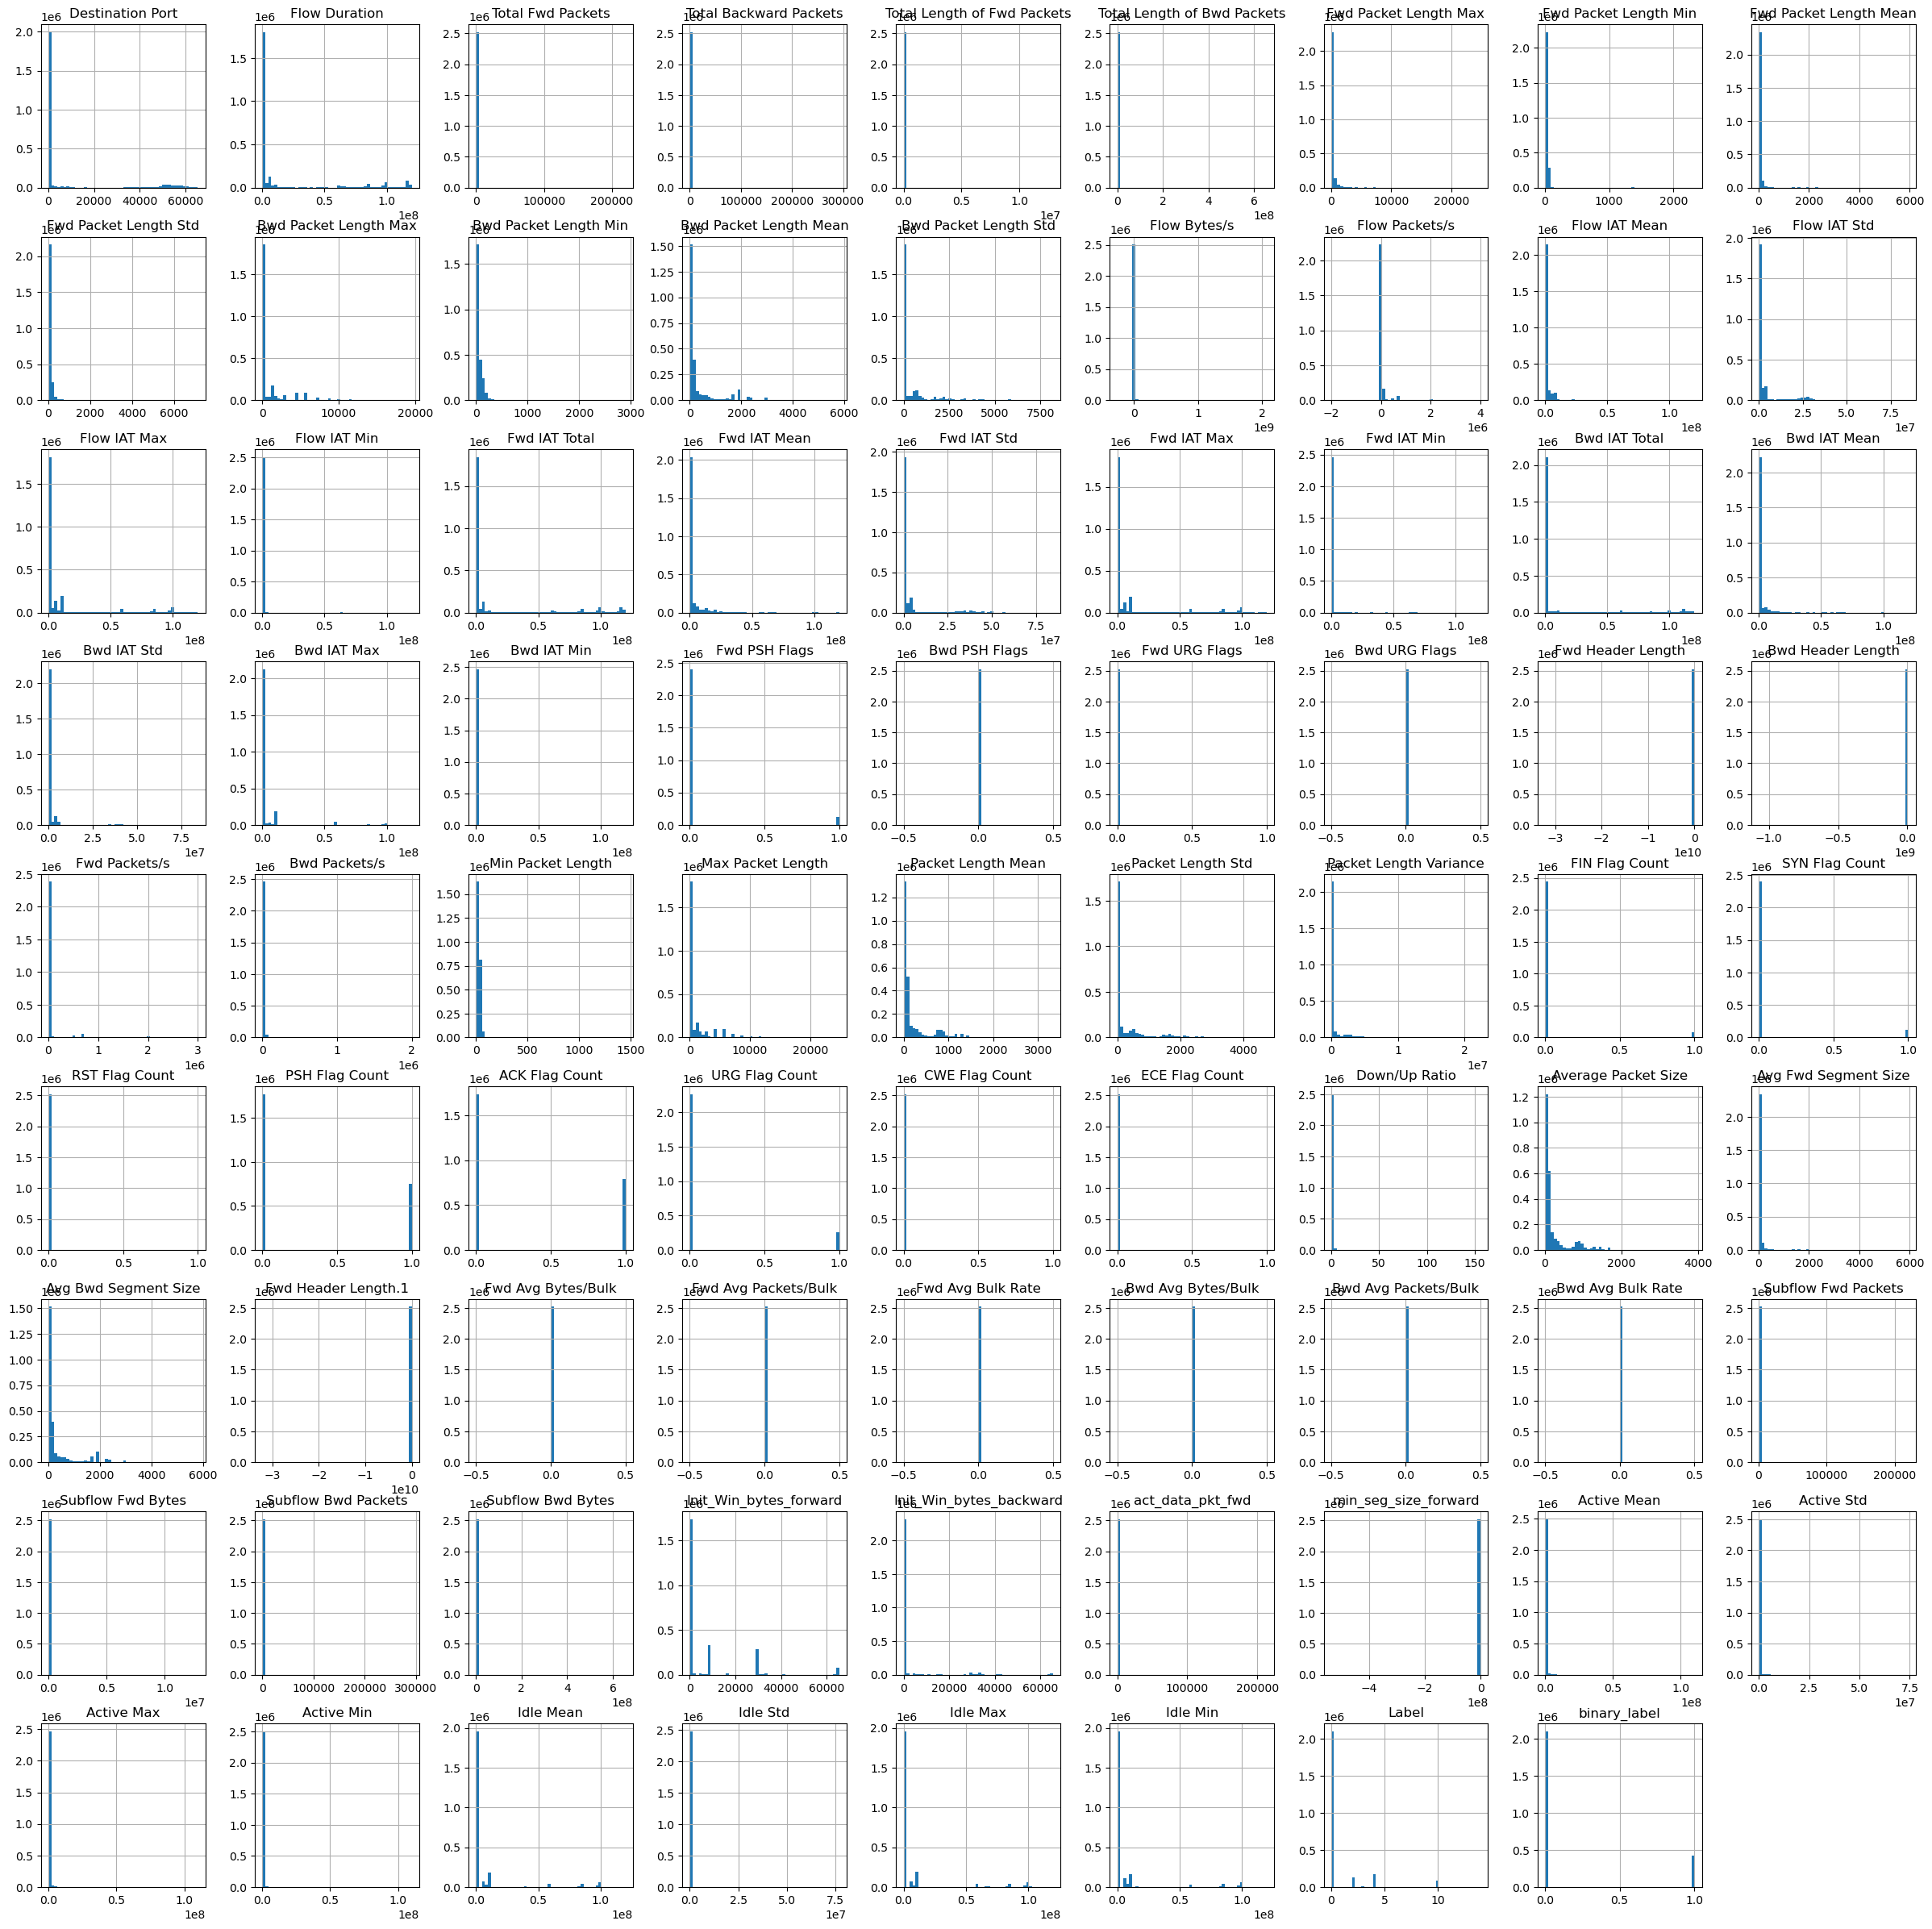

In [15]:
plt.figure(figsize=(15, 15))
data.hist(bins=50, figsize=(30, 30))
plt.show()

Text(0, 0.5, 'Skewness')

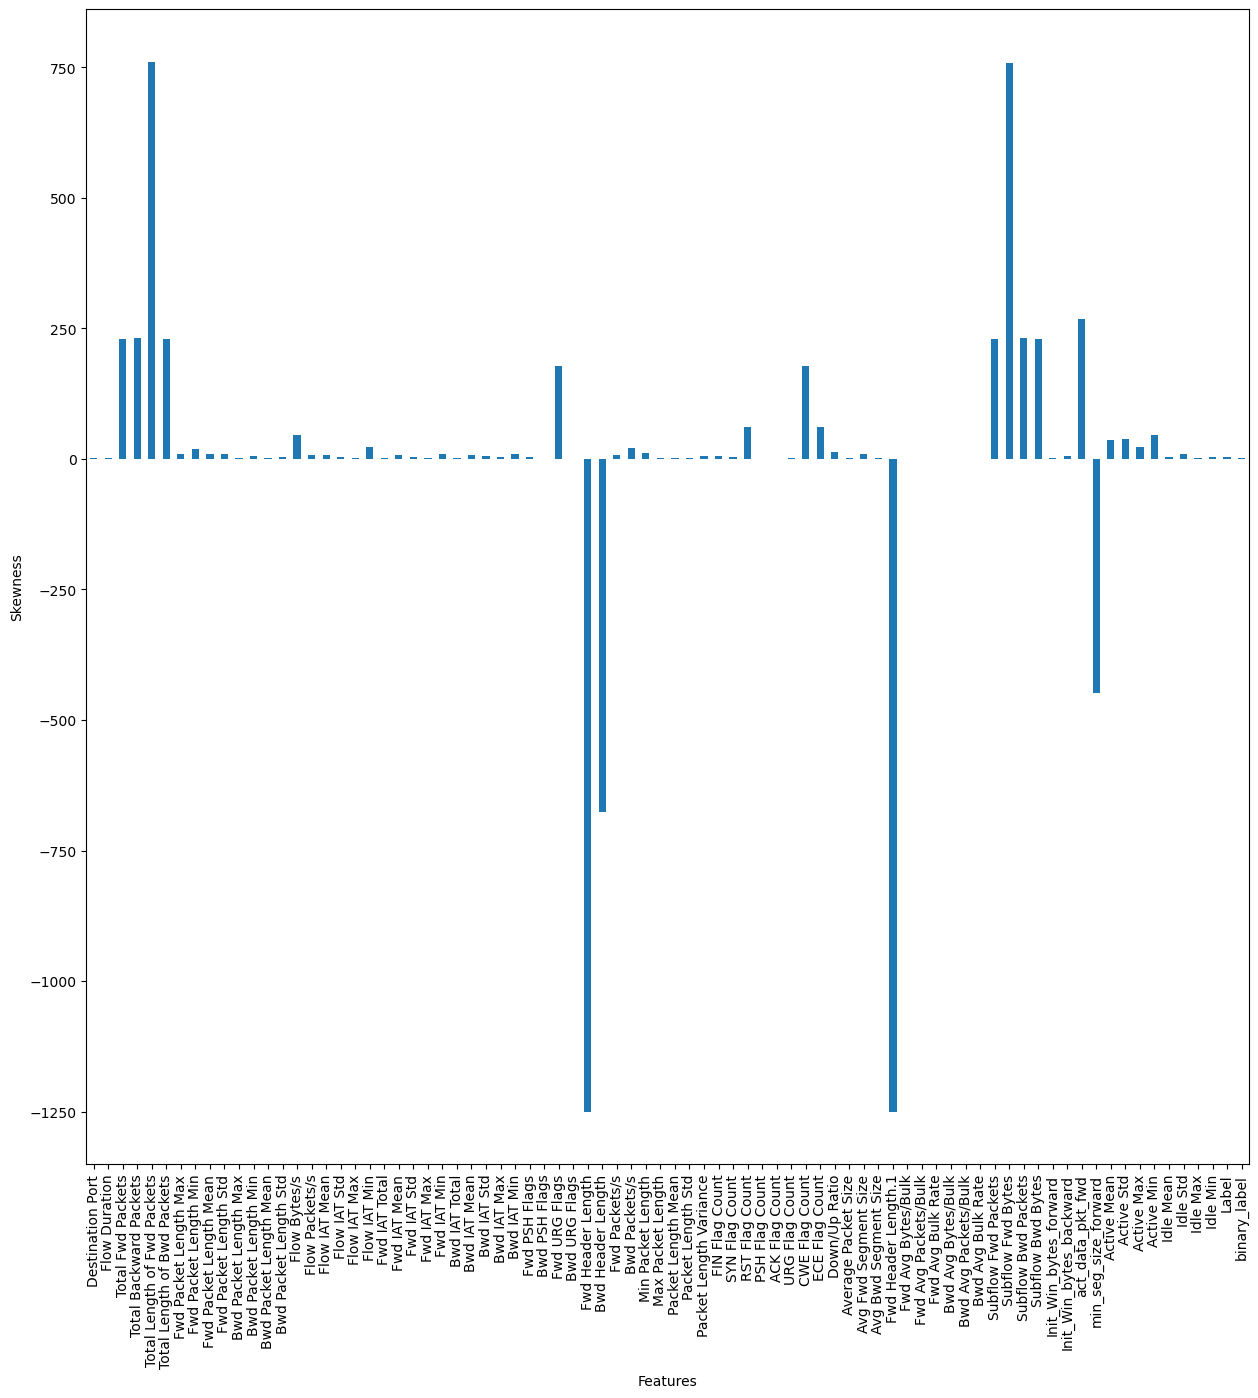

In [16]:
plt.figure(figsize=(15, 15))
skewness = data.skew()
skewness.plot(kind='bar')
plt.xlabel("Features")
plt.ylabel("Skewness")

# Feature Selection

<AxesSubplot:>

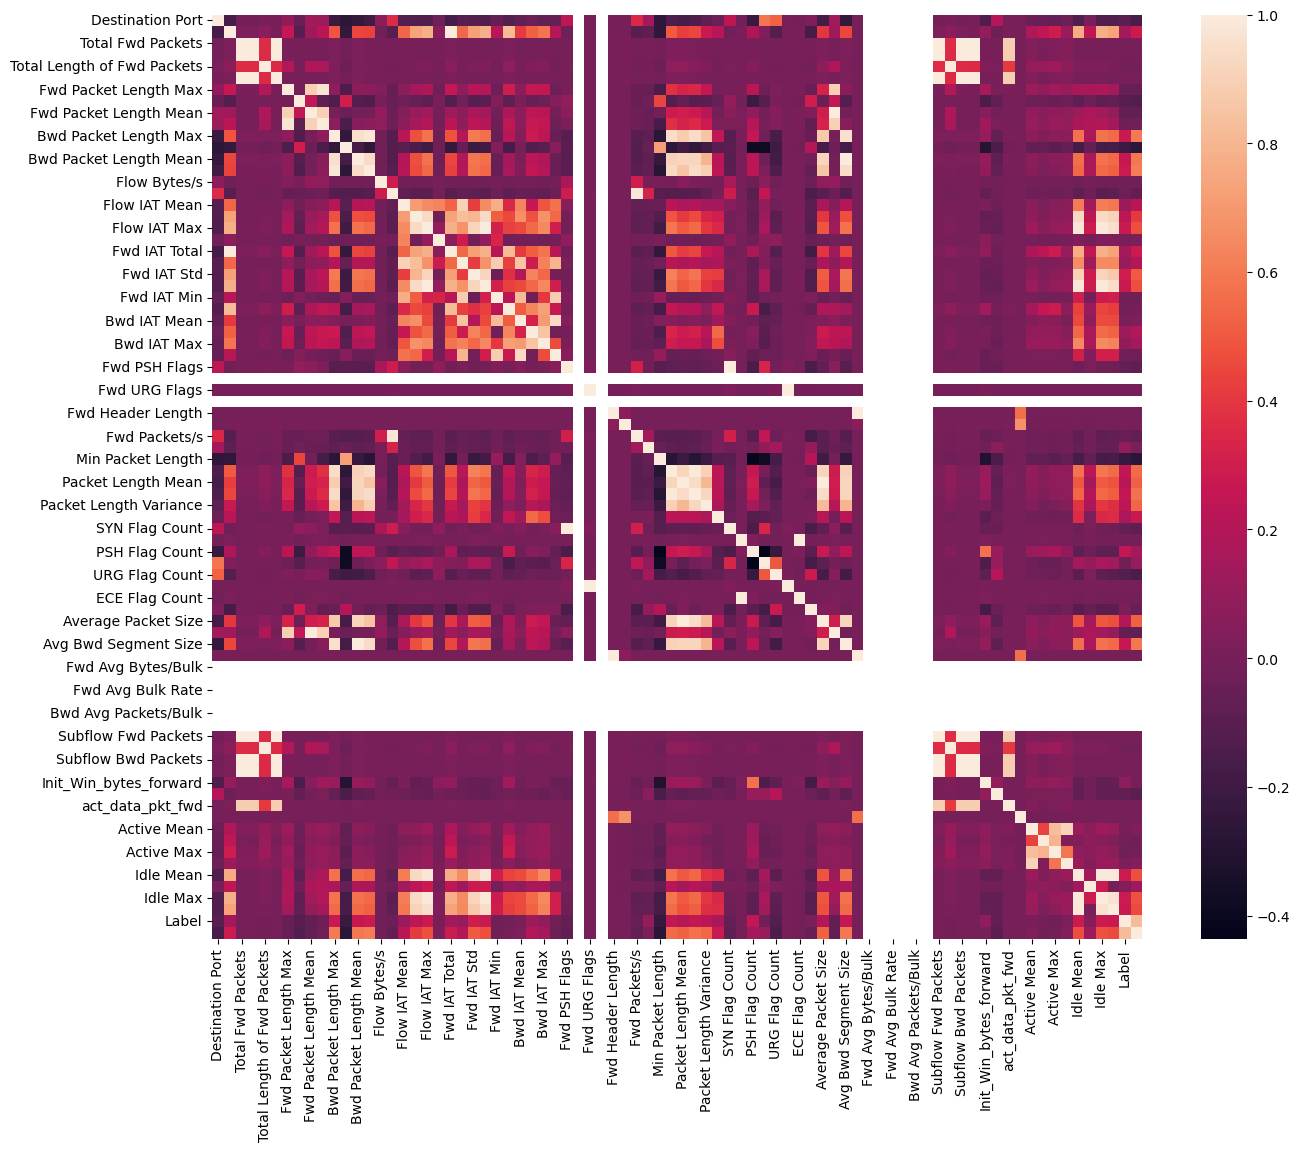

In [17]:
correlation_matrix = data.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix)

In [18]:
# The features of the dataset are not scaled (non-uniform) so the features are not comparable
# Scaling the dataset

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data_array = scaler.fit_transform(data)
scaled_data_array

array([[7.50560769e-01, 1.41666654e-07, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.50560769e-01, 1.16666656e-07, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.55107958e-01, 1.33333321e-07, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.36522469e-01, 7.33333266e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.35729000e-01, 5.08333287e-07, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.35774777e-01, 6.74999938e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## 1. Variance Threshold

In [19]:
scaled_data = pd.DataFrame(scaled_data_array, columns=data.columns)
scaled_data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,binary_label
0,0.750561,1.416667e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.001010,0.000000,0.000000,0.0,0.000000,0.000000,0.113208,0.416667,1.416667e-07,0.000000,1.416667e-07,1.500000e-07,3.333333e-08,3.333333e-08,0.000000,3.333333e-08,1.333333e-07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.999856,0.994592,0.166667,0.000000,0.004144,0.000242,0.001798,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.002312,0.001010,0.000000,0.999856,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,9.323764e-07,0.000000,0.000000e+00,0.005035,0.000000,0.000005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.750561,1.166667e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.001010,0.000000,0.000000,0.0,0.000000,0.000000,0.117067,0.666667,1.166667e-07,0.000000,1.166667e-07,1.250000e-07,8.333333e-09,8.333333e-09,0.000000,8.333333e-09,1.083333e-07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.999856,0.994592,0.666667,0.000000,0.004144,0.000242,0.001798,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.002312,0.001010,0.000000,0.999856,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,9.323764e-07,0.000000,0.000000e+00,0.005035,0.000000,0.000005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.755108,1.333333e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.001010,0.000000,0.000000,0.0,0.000000,0.000000,0.113636,0.444444,1.333333e-07,0.000000,1.333333e-07,1.416667e-07,2.500000e-08,2.500000e-08,0.000000,2.500000e-08,1.250000e-07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.999856,0.994592,0.222222,0.000000,0.004144,0.000242,0.001798,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.002312,0.001010,0.000000,0.999856,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,9.323764e-07,0.000000,0.000000e+00,0.003754,0.000000,0.000005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.755108,1.166667e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.001010,0.000000,0.000000,0.0,0.000000,0.000000,0.117067,0.666667,1.166667e-07,0.000000,1.166667e-07,1.250000e-07,8.333333e-09,8.333333e-09,0.000000,8.333333e-09,1.083333e-07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.999856,0.994592,0.666667,0.000000,0.004144,0.000242,0.001798,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.002312,0.001010,0.000000,0.999856,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,9.323764e-07,0.000000,0.000000e+00,0.003754,0.000000,0.000005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001343,5.183333e-06,0.000027,0.000014,3.751938e-05,6.316242e-07,0.009388,0.000000,0.011639,0.015713,0.010599,0.0,0.017843,0.014584,0.112553,0.336344,6.158333e-07,0.000001,3.283333e-06,1.333333e-07

In [20]:
scaled_variance = scaled_data.var(axis=0)
scaled_variance

Destination Port               8.416772e-02
Flow Duration                  8.620468e-02
Total Fwd Packets              1.306806e-05
Total Backward Packets         1.310848e-05
Total Length of Fwd Packets    6.737059e-07
Total Length of Bwd Packets    1.338688e-05
Fwd Packet Length Max          9.286913e-04
Fwd Packet Length Min          6.838132e-04
Fwd Packet Length Mean         1.083500e-03
Fwd Packet Length Std          1.735895e-03
Bwd Packet Length Max          1.089311e-02
Bwd Packet Length Min          5.990277e-04
Bwd Packet Length Mean         1.189262e-02
Bwd Packet Length Std          1.155963e-02
Flow Bytes/s                   1.298236e-04
Flow Packets/s                 1.140599e-03
Flow IAT Mean                  1.523078e-03
Flow IAT Std                   9.945187e-03
Flow IAT Max                   4.581514e-02
Flow IAT Min                   6.309741e-04
Fwd IAT Total                  8.588017e-02
Fwd IAT Mean                   6.967233e-03
Fwd IAT Std                    1

<AxesSubplot:xlabel='Features', ylabel='Variance'>

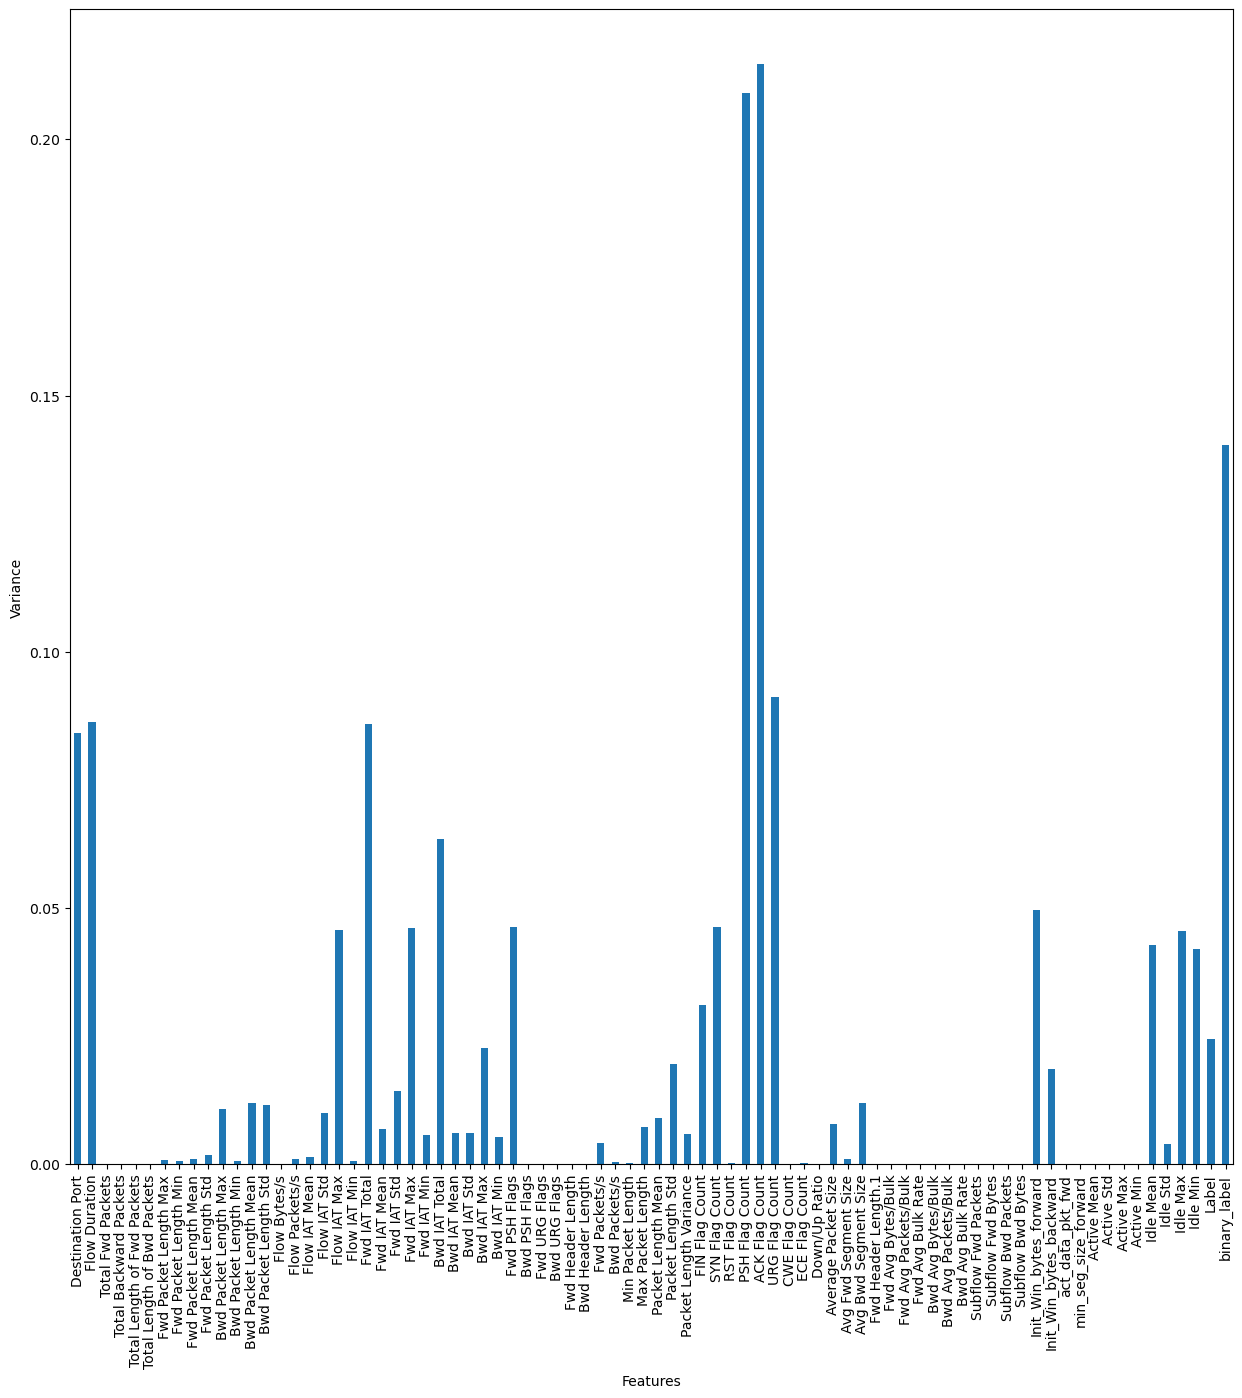

In [21]:
plt.figure(figsize=(15, 15))
plt.xlabel('Features')
plt.ylabel('Variance')
scaled_variance.plot(kind="bar")

In [22]:
remove_cols = []
for i in range(len(scaled_variance)):
    if scaled_variance[i] <= 0.0:
        remove_cols.append(data.columns[i])
remove_cols

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

In [23]:
for i in remove_cols:
    data.drop(i, axis=1, inplace=True)
data.shape

(2520798, 72)

<AxesSubplot:>

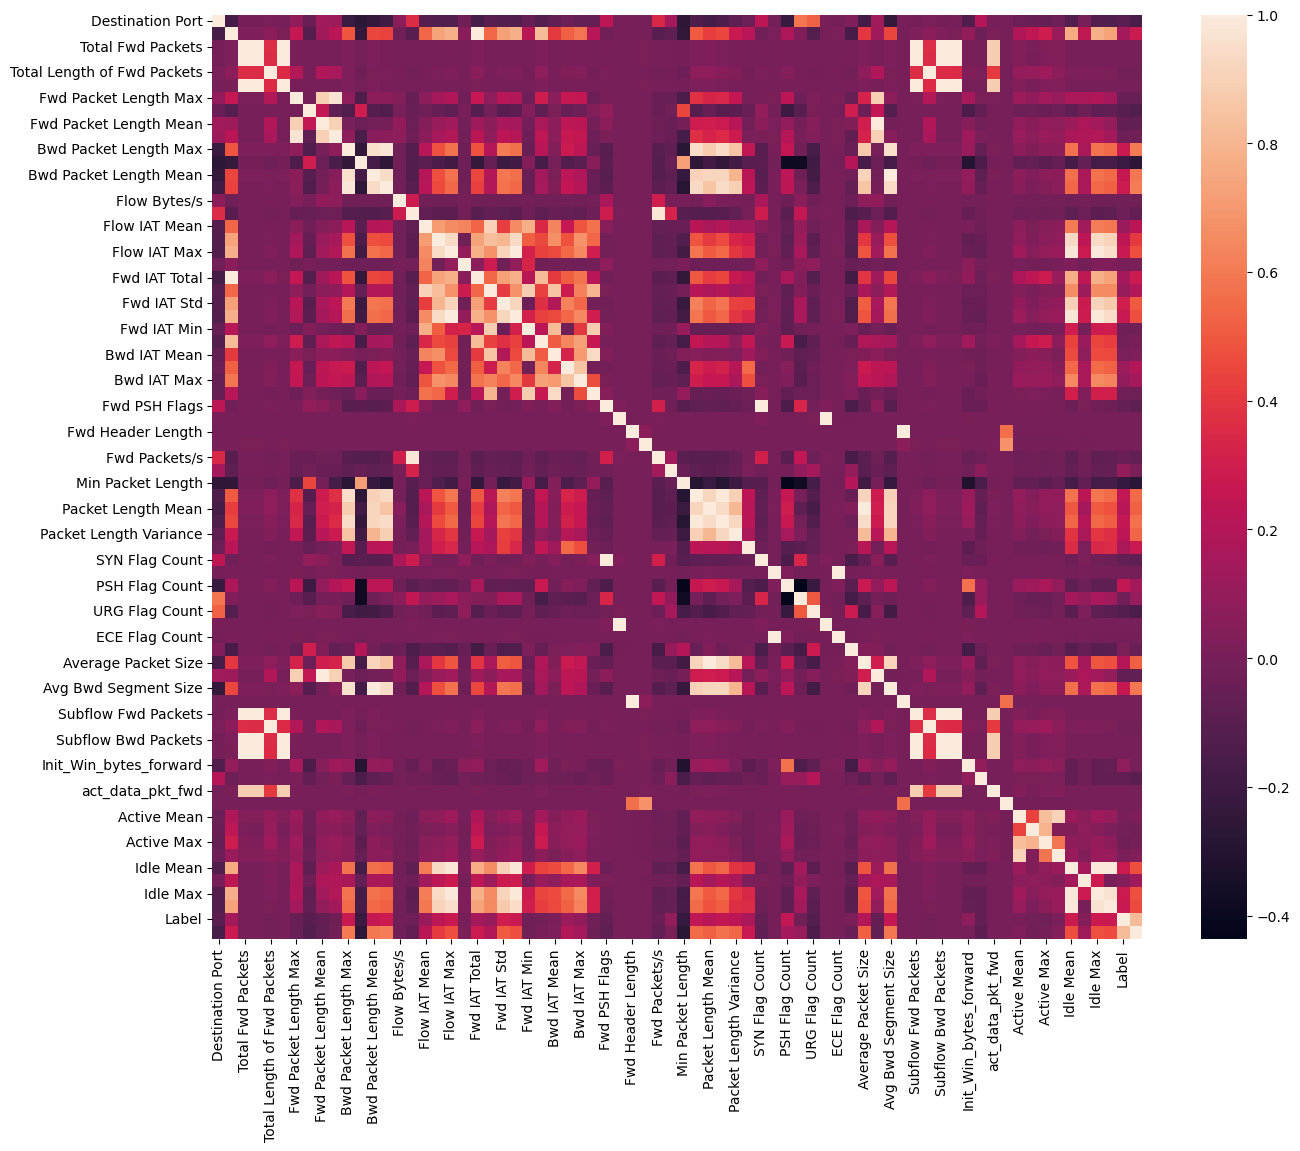

In [24]:
correlation_matrix_rev = data.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_rev)

## 2. ANOVA

In [25]:
from sklearn.feature_selection import f_classif

f_val, p_val = f_classif(X=data.loc[:, "Destination Port": "Label"], y=data["binary_label"])
# print(f_val, p_val)
anova_score = pd.DataFrame(f_val, columns=['f_val'])
anova_score['p_val'] = p_val
anova_score['features'] = data.columns[:len(data.columns)-1]
anova_score

,f_val,p_val,features
0,6.589061e+04,0.000000e+00,Destination Port
1,2.127981e+05,0.000000e+00,Flow Duration
2,2.352793e+01,1.231210e-06,Total Fwd Packets
3,2.542171e+01,4.607366e-07,Total Backward Packets
4,5.733004e+02,1.110730e-126,Total Length of Fwd Packets
5,1.140655e+01,7.318673e-04,Total Length of Bwd Packets
6,6.071804e+03,0.000000e+00,Fwd Packet Length Max
7,4.409933e+04,0.000000e+00,Fwd Packet Length Min
8,1.402252e+04,0.000000e+00,Fwd Packet Length Mean
9,1.732101e+03,0.000000e+00,Fwd Packet Length Std


In [27]:
remove_cols2 = anova_score[round(anova_score['p_val'], 8) > 0.05]['features']
remove_cols2

32       Fwd Header Length
33       Bwd Header Length
53     Fwd Header Length.1
61    min_seg_size_forward
Name: features, dtype: object

In [28]:
for i in remove_cols2:
    data.drop(i, axis=1, inplace=True)
data.shape

(2520798, 68)

Text(0, 0.5, 'Skewness')

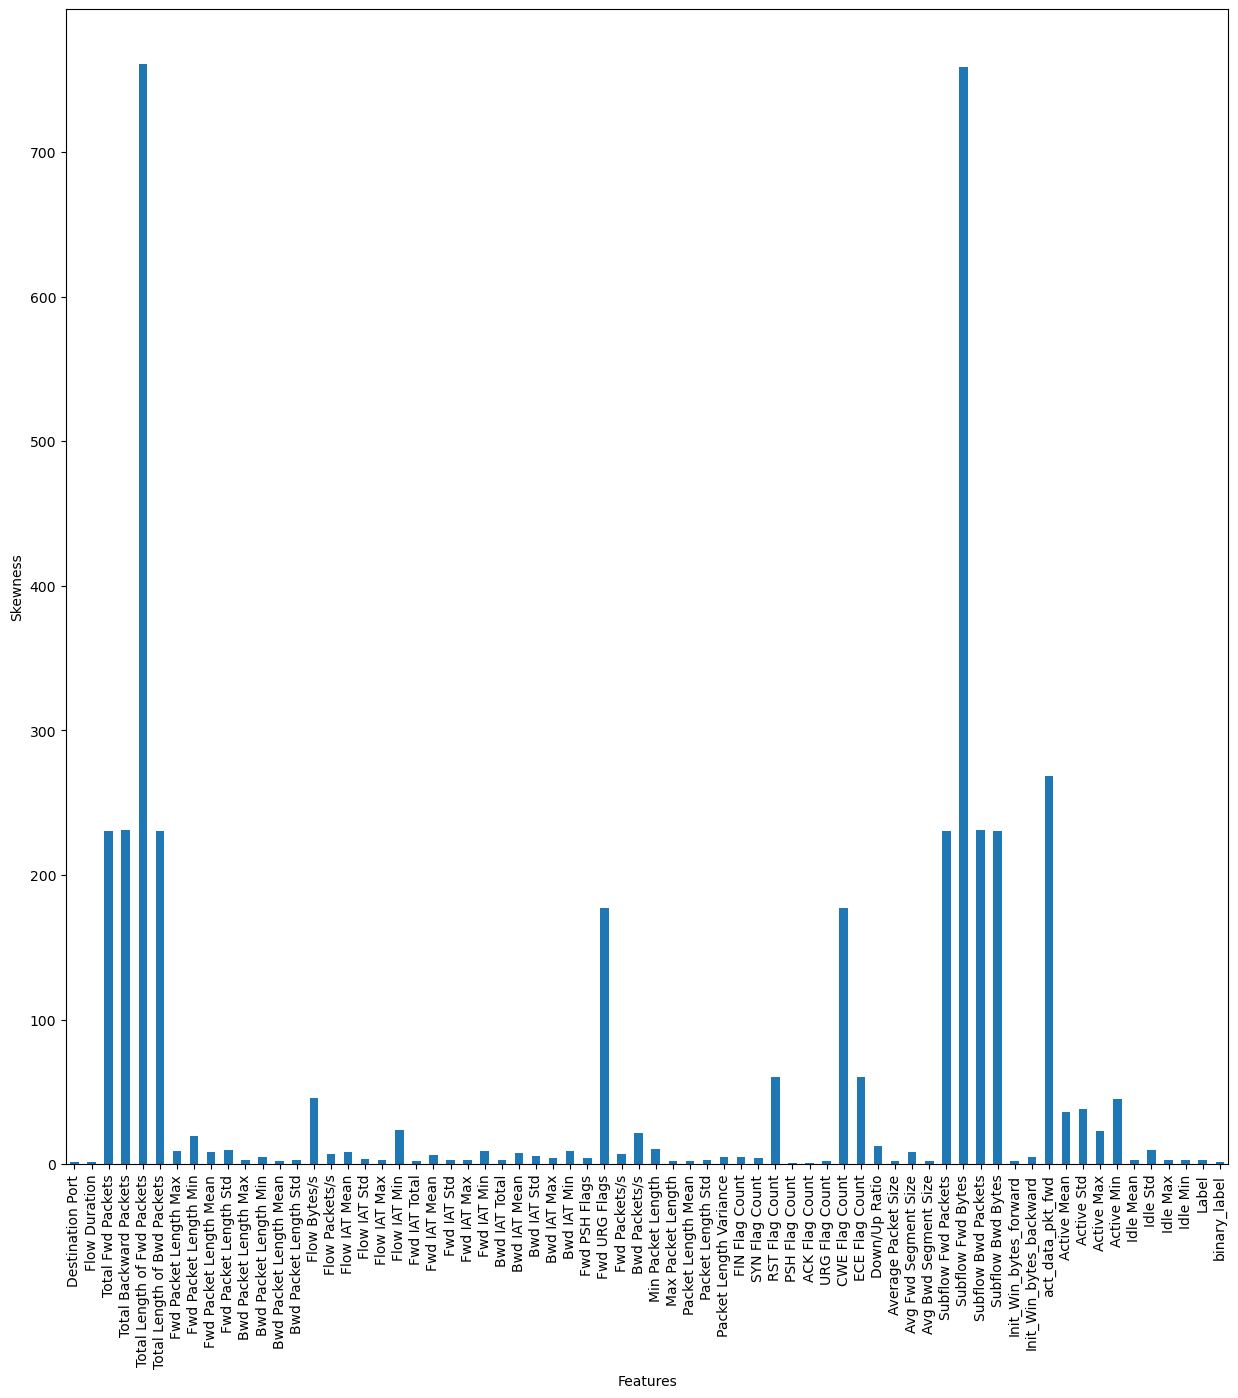

In [29]:
plt.figure(figsize=(15, 15))
skewness = data.skew()
skewness.plot(kind='bar')
plt.xlabel("Features")
plt.ylabel("Skewness")

## 3. Mutual Information

In [32]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(data.loc[:, "Destination Port": "Label"], data["binary_label"])
mutual_info = pd.Series(mutual_info)
mutual_info.index = data.columns[:67]
mutual_info.sort_values(ascending=False)

Label                          0.476579
Average Packet Size            0.352669
Packet Length Variance         0.335359
Packet Length Std              0.335224
Packet Length Mean             0.325272
Total Length of Bwd Packets    0.301614
Subflow Bwd Bytes              0.301599
Bwd Packet Length Mean         0.297397
Avg Bwd Segment Size           0.297175
Max Packet Length              0.277590
Init_Win_bytes_forward         0.272963
Bwd Packet Length Max          0.272422
Subflow Fwd Bytes              0.270544
Total Length of Fwd Packets    0.270274
Destination Port               0.268459
Init_Win_bytes_backward        0.265232
Fwd Packet Length Max          0.245871
Bwd Packet Length Std          0.231734
Fwd IAT Max                    0.231720
Fwd IAT Total                  0.219213
Flow IAT Max                   0.214806
Fwd Packet Length Std          0.214401
Avg Fwd Segment Size           0.209092
Fwd Packet Length Mean         0.208992
Fwd IAT Mean                   0.206510


In [37]:
remove_cols3 = [mutual_info.index[i] for i in range(len(mutual_info)) if mutual_info[i] < 0.01]
remove_cols3

['Fwd PSH Flags',
 'Fwd URG Flags',
 'SYN Flag Count',
 'RST Flag Count',
 'CWE Flag Count',
 'ECE Flag Count']

In [38]:
for i in remove_cols3:
    data.drop(i, axis=1, inplace=True)
data.shape

(2520798, 62)

# SMOTE

In [39]:
X = data.iloc[:, :60]
Y = data.iloc[:, 61]
print(X.columns)
Y.head()

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'Down/Up Ratio',
       'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Se

0    0
1    0
2    0
3    0
4    0
Name: binary_label, dtype: int64

In [40]:
X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,49188,4,2,0,12,0,6,6,6.000000,0.000000,0,0,0.0,0.000000,3.000000e+06,5.000000e+05,4.0,0.000000,4,4,4,4.0,0.000000,4,4,0,0.000000,0.000000,0,0,5.000000e+05,0.000000,6,6,6.000000,0.000000,0.000000,0,0,1,1,0,9.000000,6.000000,0.0,2,12,0,0,329,-1,1,0.0,0.0,0,0,0.0,0.0,0,0
1,49188,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.0,0.000000,1.200000e+07,2.000000e+06,1.0,0.000000,1,1,1,1.0,0.000000,1,1,0,0.000000,0.000000,0,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000,0,0,1,1,0,9.000000,6.000000,0.0,2,12,0,0,329,-1,1,0.0,0.0,0,0,0.0,0.0,0,0
2,49486,3,2,0,12,0,6,6,6.000000,0.000000,0,0,0.0,0.000000,4.000000e+06,6.666667e+05,3.0,0.000000,3,3,3,3.0,0.000000,3,3,0,0.000000,0.000000,0,0,6.666667e+05,0.000000,6,6,6.000000,0.000000,0.000000,0,0,1,1,0,9.000000,6.000000,0.0,2,12,0,0,245,-1,1,0.0,0.0,0,0,0.0,0.0,0,0
3,49486,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.0,0.000000,1.200000e+07,2.000000e+06,1.0,0.000000,1,1,1,1.0,0.000000,1,1,0,0.000000,0.000000,0,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000,0,0,1,1,0,9.000000,6.000000,0.0,2,12,0,0,245,-1,1,0.0,0.0,0,0,0.0,0.0,0,0
4,88,609,7,4,484,414,233,0,69.142857,111.967895,207,0,103.5,119.511506,1.474548e+06,1.806240e+04,60.9,115.194956,381,2,609,101.5,177.089525,460,2,467,155.666667,263.560872,460,3,1.149425e+04,6568.144499,0,233,74.833333,107.527445,11562.151515,0,1,0,0,0,81.636364,69.142857,103.5,7,484,4,414,8192,2053,5,0.0,0.0,0,0,0.0,0.0,0,0


<AxesSubplot:>

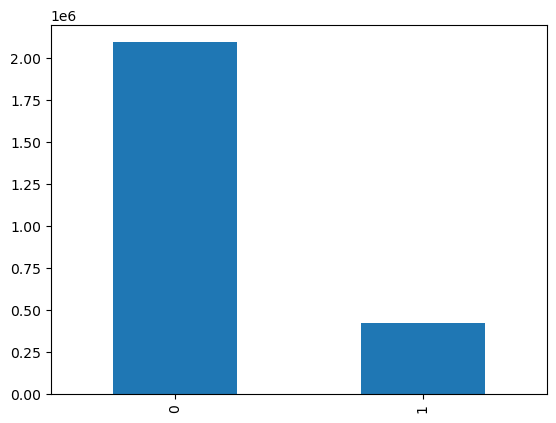

In [41]:
Y.value_counts().plot(kind='bar')

In [42]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [44]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [45]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(2807278, 60)
(2807278,)


0    1403639
1    1403639
Name: binary_label, dtype: int64


<AxesSubplot:>

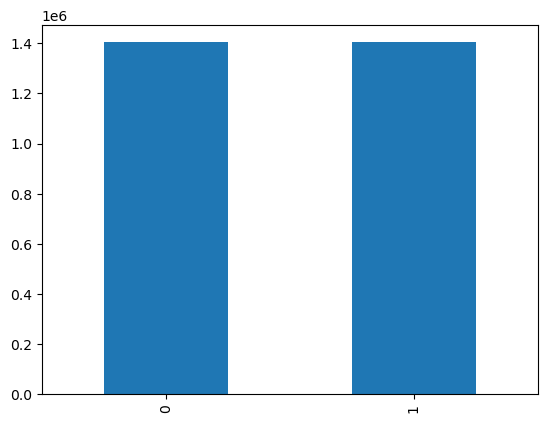

In [46]:
print(y_train_resampled.value_counts())
y_train_resampled.value_counts().plot(kind='bar')

In [47]:
X_train_resampled.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,443,435101,11,9,502,4076,198,0,45.636364,76.357413,1418,0,452.888889,602.322265,10521.694963,45.966339,2.290005e+04,4.555496e+04,197847,2,435101,4.351010e+04,5.933359e+04,197847,68,185067,2.313338e+04,3.283201e+04,72150,2,25.281486,20.684852,0,1418,218.000000,437.694071,1.915761e+05,0,1,0,0,0,228.900000,45.636364,452.888889,11,502,9,4076,29200,340,4,0.0,0.0,0,0,0.0,0.0,0,0
1,80,84692281,6,8,393,11595,375,0,65.500000,151.651904,5792,0,1449.375000,2046.673464,141.547729,0.165304,6.514791e+06,2.340000e+07,84500000,2,84500000,1.690000e+07,3.780000e+07,84500000,2,84700000,1.210000e+07,3.190000e+07,84500000,46,0.070845,0.094460,0,5792,799.600000,1618.596738,2.619855e+06,1,0,0,0,1,856.714286,65.500000,1449.375000,6,393,8,11595,0,235,3,12021.0,0.0,12021,12021,84500000.0,0.0,84500000,84500000
2,2035,78,1,1,2,6,2,2,2.000000,0.000000,6,6,6.000000,0.000000,102564.102600,25641.025640,7.800000e+01,0.000000e+00,78,78,0,0.000000e+00,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,12820.512820,12820.512820,2,6,3.333333,2.309401,5.333333e+00,0,1,0,0,1,5.000000,2.000000,6.000000,1,2,1,6,1024,0,0,0.0,0.0,0,0,0.0,0.0,0,0
3,22,1467387,39,46,2568,6954,408,0,65.846154,103.092585,976,0,151.173913,307.380134,6489.085701,57.926096,1.746889e+04,1.048787e+05,952265,1,1467387,3.861545e+04,1.640524e+05,995482,3,514983,1.144407e+04,2.597781e+04,126227,1,26.577856,31.348240,0,976,110.720930,238.170806,5.672533e+04,0,1,0,0,1,112.023529,65.846154,151.173913,39,2568,46,6954,8192,245,24,0.0,0.0,0,0,0.0,0.0,0,0
4,53,31235,2,2,74,238,37,37,37.000000,0.000000,119,119,119.000000,0.000000,9988.794621,128.061469,1.041167e+04,1.803007e+04,31231,1,1,1.000000e+00,0.000000e+00,1,1,3,3.000000e+00,0.000000e+00,3,3,64.030735,64.030735,37,119,69.800000,44.913250,2.017200e+03,0,0,0,0,1,87.250000,37.000000,119.000000,2,74,2,238,-1,-1,1,0.0,0.0,0,0,0.0,0.0,0,0


In [48]:
import os

folder_name1 = "./Dataset/Training"
folder_name2 = "./Dataset/Testing"
try:
    os.mkdir(folder_name1)
    os.mkdir(folder_name2)
    print(f"Directory '{folder_name1}' created successfully.")
    print(f"Directory '{folder_name2}' created successfully.")
except FileExistsError:
    print(f"Directory '{folder_name1}' already exists.")
    print(f"Directory '{folder_name2}' already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create '{folder_name1}'.")
    print(f"Permission denied: Unable to create '{folder_name2}'.")
except Exception as e:
    print(f"An error occurred: {e}")

Directory './Dataset/Training' created successfully.
Directory './Dataset/Testing' created successfully.


In [49]:
X_train_resampled.to_csv('./Dataset/Training/CIC_IDS_2017_trainX.csv', index=False)
y_train_resampled.to_csv('./Dataset/Training/CIC_IDS_2017_trainY.csv', index=False)
X_test.to_csv('./Dataset/Testing/CIC_IDS_2017_testX.csv', index=False)
y_test.to_csv('./Dataset/Testing/CIC_IDS_2017_testY.csv', index=False)